#Analisis ETL

##Librerias nesesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime

##Extraccion y carga de lo datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_12/movies_dataset.csv")

<ipython-input-5-dabe066a0e64>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv_12/movies_dataset.csv")


In [ ]:
df1

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

###Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [ ]:
df1["budget"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: budget
Non-Null Count  Dtype 
--------------  ----- 
45466 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [ ]:
df1["revenue"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
45460 non-null  float64
dtypes: float64(1)
memory usage: 355.3 KB


<Axes: >

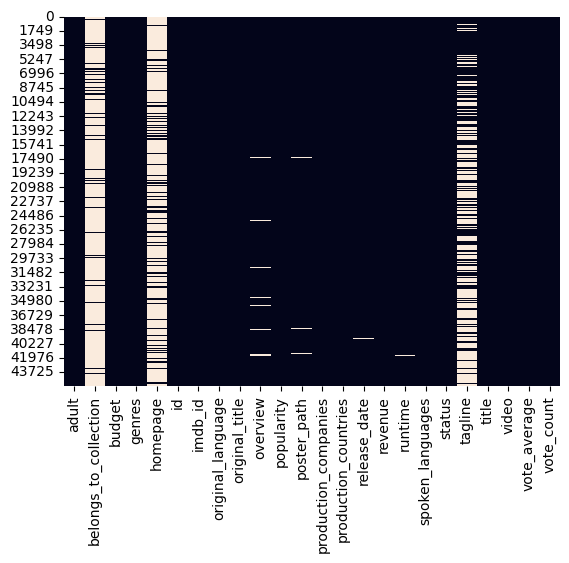

In [ ]:
#visualizo los valore faltantes o nulos
sns.heatmap(df1.isnull(), cbar=False)

In [ ]:
#Reemplazo los valores nulos en revenue y budget por 0:
df1["revenue"] = df1["revenue"].replace(np.nan, 0)
df1["budget"] = df1["budget"].replace(np.nan, 0)

###Los valores nulos del campo release date deben eliminarse.

<Axes: >

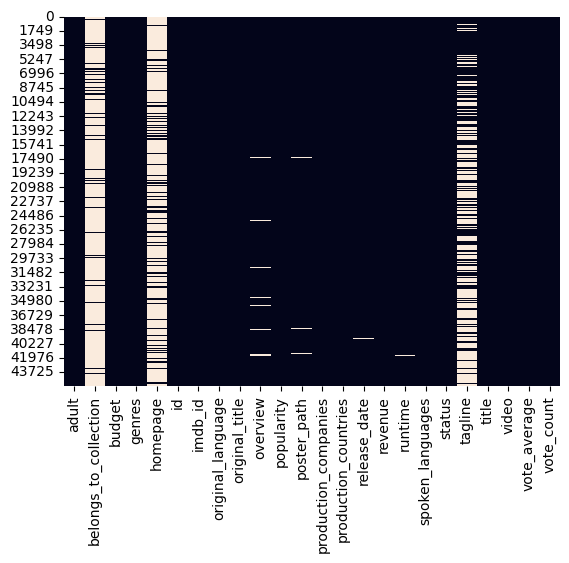

In [ ]:
#visualizo los valore faltantes o nulos
sns.heatmap(df1.isnull(), cbar=False)

In [ ]:
df1["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [ ]:
df1["release_date"].describe()

count          45379
unique         17336
top       2008-01-01
freq             136
Name: release_date, dtype: object

In [ ]:
df1.dropna(subset=['release_date'],axis=0, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45379 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  object 
 3   genres                 45379 non-null  object 
 4   homepage               7769 non-null   object 
 5   id                     45379 non-null  object 
 6   imdb_id                45365 non-null  object 
 7   original_language      45368 non-null  object 
 8   original_title         45379 non-null  object 
 9   overview               44438 non-null  object 
 10  popularity             45377 non-null  object 
 11  poster_path            45040 non-null  object 
 12  production_companies   45379 non-null  object 
 13  production_countries   45379 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
df1.reset_index(drop=True, inplace=True)
len(df1)

45379

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45379 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  object 
 3   genres                 45379 non-null  object 
 4   homepage               7769 non-null   object 
 5   id                     45379 non-null  object 
 6   imdb_id                45365 non-null  object 
 7   original_language      45368 non-null  object 
 8   original_title         45379 non-null  object 
 9   overview               44438 non-null  object 
 10  popularity             45377 non-null  object 
 11  poster_path            45040 non-null  object 
 12  production_companies   45379 non-null  object 
 13  production_countries   45379 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

<Axes: >

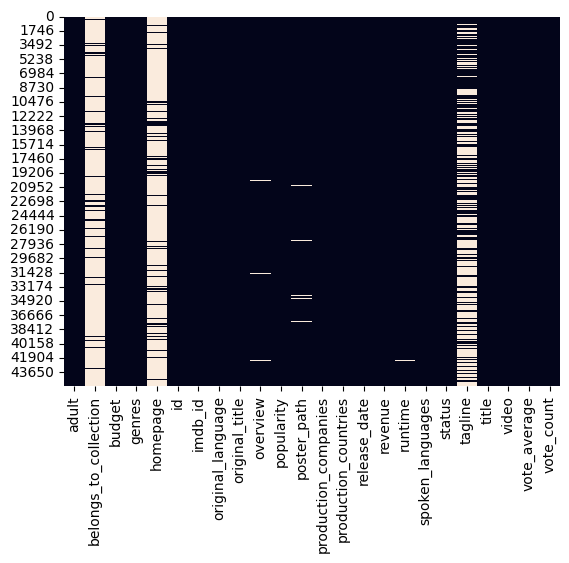

In [ ]:
#visualizo los valores faltantes o nulos y observo que en la column releae  no existen
sns.heatmap(df1.isnull(), cbar=False)


###De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [ ]:
df1["release_date"] = pd.to_datetime(df1["release_date"], format='%Y-%m-%d')
df1['release_date'] = pd.to_datetime (df1['release_date'])

ValueError: ignored

In [ ]:
df1["release_date"]=df1["release_date"].astype('string')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45379 non-null  object 
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45379 non-null  object 
 3   genres                 45379 non-null  object 
 4   homepage               7769 non-null   object 
 5   id                     45379 non-null  object 
 6   imdb_id                45365 non-null  object 
 7   original_language      45368 non-null  object 
 8   original_title         45379 non-null  object 
 9   overview               44438 non-null  object 
 10  popularity             45377 non-null  object 
 11  poster_path            45040 non-null  object 
 12  production_companies   45379 non-null  object 
 13  production_countries   45379 non-null  object 
 14  release_date           45379 non-null  string 
 15  re

In [ ]:
df1["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45379 entries, 0 to 45378
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  string
dtypes: string(1)
memory usage: 354.6 KB


In [ ]:
#identifico las filas con error
for i in df1.index:
     if len(str(df1["release_date"][i]))<10:
            print("posicion o fila",[i],"dato",df1["release_date"][i])
            print("error")


posicion o fila [19714] dato 1
error
posicion o fila [29472] dato 12
error
posicion o fila [35543] dato 22
error


In [ ]:
for i in df1.index:

     if len(str(df1["release_date"][i]))<10:
           df1["release_date"][i]="0000-00-00"
# surge un error estamos haciendo asignacion en una copia se corrige haciendo
# la asignacion directa en la pcicion directa en el dataframe sin usar el ciclo for
# Para la busqueda de la posicion estuvo correcta pero no para la asignacion mediante ciclo for

In [ ]:
df1["release_date"][19714]="2000-01-01"

In [ ]:
df1["release_date"][29472]="2000-01-01"

In [ ]:
df1["release_date"][35543]="2000-01-01"

In [ ]:
for i in df1.index:
     if len(str(df1["release_date"][i]))<10:
            print(i)
            print(df1["release_date"][i])
            print("error")
# no arroja resultados

In [ ]:
#opcion para determinar i funcion ignorando el error
#df4["release_date"] =  pd.to_datetime(df4["release_date"], format='%Y-%m-%d', errors='ignore')

#forma correcta luego de corregir errores
df1["release_date"] =  pd.to_datetime(df1["release_date"], format="%Y-%m-%d")

In [ ]:
df1["release_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45379 entries, 0 to 45378
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
45379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 354.6 KB


Se creo la serie para evitar:   SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame y asignarla lo cual lo corrigio

In [ ]:
#Se creo la serie para evitar:   SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
# y asignarla lo cual lo corrigio
df = pd.Series([])
for i in df1["release_date"].index:
      cop=datetime.strftime(df1["release_date"][i],'%Y')
      df [i]= cop


<ipython-input-32-08e7f25fcc92>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.Series([])


In [ ]:
df.info()

<class 'pandas.core.series.Series'>
Int64Index: 45379 entries, 0 to 45378
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 709.0+ KB


In [ ]:
df

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45374    1991
45375    2011
45376    2003
45377    1917
45378    2017
Length: 45379, dtype: object

In [ ]:
df1["release_year"]=df

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45379 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45379 non-null  object        
 3   genres                 45379 non-null  object        
 4   homepage               7769 non-null   object        
 5   id                     45379 non-null  object        
 6   imdb_id                45365 non-null  object        
 7   original_language      45368 non-null  object        
 8   original_title         45379 non-null  object        
 9   overview               44438 non-null  object        
 10  popularity             45377 non-null  object        
 11  poster_path            45040 non-null  object        
 12  production_companies   45379 non-null  object        
 13  p

In [ ]:
df1["release_year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45379 entries, 0 to 45378
Series name: release_year
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 354.6+ KB


In [ ]:
df1["release_year"]

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45374    1991
45375    2011
45376    2003
45377    1917
45378    2017
Name: release_year, Length: 45379, dtype: object

### 5-Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0

In [ ]:
df1.budget = pd.to_numeric(df1.budget, downcast='float')

ValueError: ignored

In [ ]:
#  posicion donde se encuentra el error  contiene una direccion de un archivo de
#  imagen a reemplazar por 0 y que se almacenara
df1.iloc[19714,2]
#  se obtuvo>>>      /ff9qCepilowshEtG2GYWwzt2bs4.jpg
#  se reemplaza con 0

'/ff9qCepilowshEtG2GYWwzt2bs4.jpg'

In [ ]:
# Se reemplaza con cero
df1.iloc[19714,2]=0

In [ ]:
df1.iloc[19714,2]

0

In [ ]:
# Esta opcion convertia a numerico posibilitando la operacion de diviion pero
# el error debia tratarse
pd.to_numeric(df1.budget, errors='ignore')

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45374           0
45375           0
45376           0
45377           0
45378           0
Name: budget, Length: 45379, dtype: object

In [ ]:
df1["budget"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45379 entries, 0 to 45378
Series name: budget
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 354.6+ KB


In [ ]:
#Busco errores de tipo y valor en cada fila
df1.budget = pd.to_numeric(df1.budget, downcast='float')

ValueError: ignored

In [ ]:
df1.iloc[29472,2]

'/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg'

In [ ]:
#error encontrado con valor
#error >>>     /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
df1.iloc[29472,2]=0
#se reemplaza con cero

In [ ]:
#Busco errores de tipo y valor en cada fila
df1.budget = pd.to_numeric(df1.budget, downcast='float')

ValueError: ignored

In [ ]:
df1.iloc[35543,2]

'/zaSf5OG7V8X8gqFvly88zDdRm46.jpg'

In [ ]:
#error encontrado con valor
#error >>>     /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
df1.iloc[35543,2]=0
#se reemplaza con cero

In [ ]:
df1.budget = pd.to_numeric(df1.budget, downcast='float')

In [ ]:
df1.budget.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45379 entries, 0 to 45378
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
45379 non-null  float64
dtypes: float64(1)
memory usage: 354.6 KB


In [ ]:
# opcion para convertir tipo de dato que requeria previo tratamiento
# df4["budget"]=df4["budget"].astype('float64')

In [ ]:
for i in df1["budget"].index:
      if df1["budget"][i]==0:
          df1["return"]=0
          continue
      else:
          df1['return']=df1['revenue']/df1['budget']


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45379 non-null  object        
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45379 non-null  float64       
 3   genres                 45379 non-null  object        
 4   homepage               7769 non-null   object        
 5   id                     45379 non-null  object        
 6   imdb_id                45365 non-null  object        
 7   original_language      45368 non-null  object        
 8   original_title         45379 non-null  object        
 9   overview               44438 non-null  object        
 10  popularity             45377 non-null  object        
 11  poster_path            45040 non-null  object        
 12  production_companies   45379 non-null  object        
 13  p

###6-Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.


In [ ]:
df1.drop(['video','imdb_id','adult','original_title','poster_path','homepage'], axis = 'columns', inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4491 non-null   object        
 1   budget                 45379 non-null  float64       
 2   genres                 45379 non-null  object        
 3   id                     45379 non-null  object        
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45377 non-null  object        
 7   production_companies   45379 non-null  object        
 8   production_countries   45379 non-null  object        
 9   release_date           45379 non-null  datetime64[ns]
 10  revenue                45379 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  s

In [ ]:
  df1.to_csv('ETL_pi_movies.csv', index=False)